기울기 W : [[11.9]]
y절편 b : [0.8]
5시간 예측 : [[60.3]]


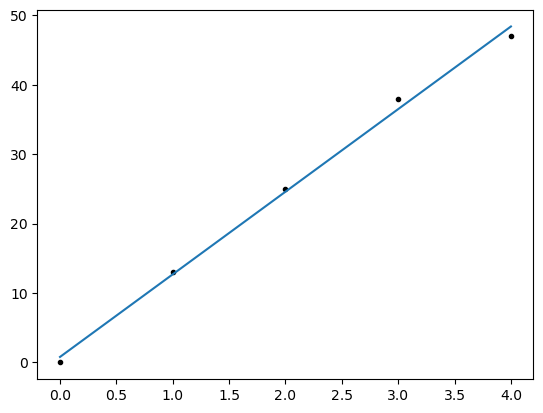

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = [[0],[1],[2],[3],[4]]
y = [[0],[13],[25], [38],[47]]

reg.fit(X,y)
print("기울기 W :", reg.coef_)
print("y절편 b :", reg. intercept_)
print("5시간 예측 :", reg.predict([[5]]))

# numpy 수학적, 행렬 / matplotlib 그래프 / pandas 데이터프레임
import matplotlib.pyplot as plt
plt.plot(X, y, '.k')
plt.plot(X, reg.predict (X))
plt.show()

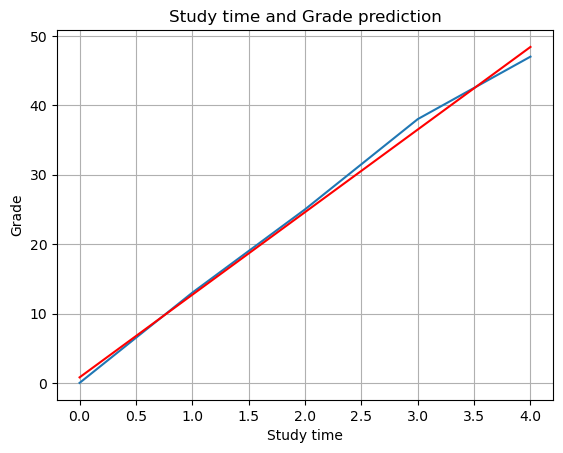

In [8]:
plt.title("Study time and Grade prediction")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.grid(True)
plt.plot(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.show()

[[4.95423926]] [5.17179756]


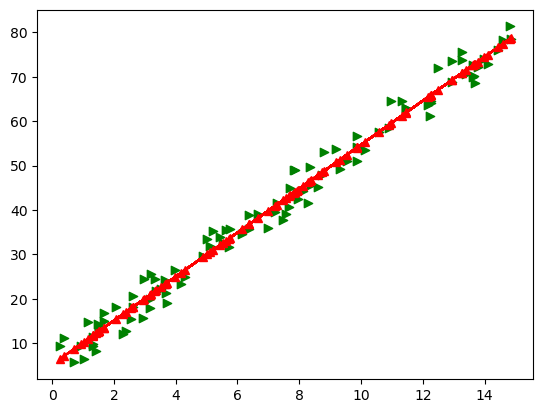

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = 15 * np.random.rand(100, 1)
y = 5 * X + 10 * np.random.rand(100, 1)

reg=LinearRegression()
reg.fit(X, y)
print (reg.coef_, reg.intercept_)

plt.scatter (X, y, marker='>', color='green')
plt.plot(X, reg.predict(X), color='red', marker="^")
plt.show()

1. make_wave로 데이터 생성
2. train_test_split 훈련 데이터와 테스트 데이터 나누기
3. score 나타내기

(60, 1)
(60,)


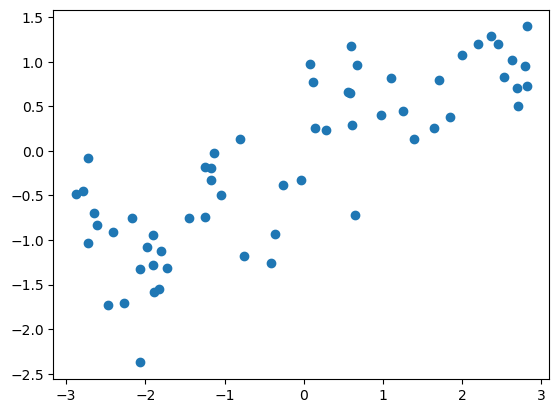

[0.39390555] -0.031804343026759704
훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    X = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * X) + X)
    y = (y_no_noise + rnd.normal(size=len(X))) / 2
    return X.reshape(-1, 1), y


X, y = make_wave(60)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X, y)
plt.show()

model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

print(f'훈련 세트 점수 : {model.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {model.score(X_test, y_test):.2f}')

캘리포니아 집값 - 선형회귀
1. Toy 데이터 가져오기 from sklearn
2. Score - MSE, R^2

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)
model.fit(X_train, y_train)

print("학습 데이터 :", model.score(X_train, y_train))
print("테스트 데이터 :", model.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing.data, housing.target, cv=10, scoring='neg_mean_squared_error')
print(f"NMSE mean : {score.mean()}")
print(f"NMSE mean : {score.std()}")

r2_score = cross_val_score(model, housing.data, housing.target, cv=10, scoring='r2')
print("R^2 score :", r2_score.mean())

학습 데이터 : 0.6063785118187932
테스트 데이터 : 0.6054105232106715
NMSE mean : -0.5509524296956647
NMSE mean : 0.19288582953865155
R^2 score : 0.5110068610523766


In [13]:
import pandas as pd
df = pd.read_csv('../Data/manhattan.csv')
print(df.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

In [14]:
from sklearn.model_selection import train_test_split
X = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'has_elevator']]
y = df[['rent']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)

[[-289.8177468  1259.77777113    4.78320553  -19.10249494   22.71358516
    -7.43954115   20.73409392]] [-476.45444752]


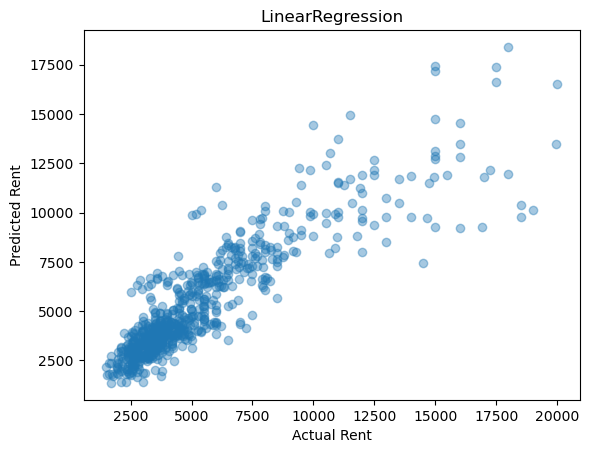

In [15]:
y_predict = lr.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("LinearRegression")
plt.show()